In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import seaborn as sns
import pandas as pd

In [2]:
num_samples = 500
noise_level = 0.2
def moons_plt(model, X, y, axes=[-2, 3, -2, 2]):
    """
    model: SVM model
    X: feature matrix shape(m_samples, n_features)
    y: label vector shape(m_samples, )
    axes = [xmin, xmax, ymin, ymax]: (optional) plot axes
    """
    # Create a mesh grid based on the provided axes (100 x 100 resolution)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s,x1s) # create a mesh grid
    X_mesh = np.c_[x0.ravel(), x1.ravel()] # convert all mesh points into 2-D points
    y_pred = model.predict(X_mesh).reshape(x0.shape) # predict then covert back to the 2-D
    y_decision = model.decision_function(X_mesh).reshape(x0.shape)

    plt.figsize=(16, 9)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo", label="Class 0")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "go", label="Class 1")
    # Plot out the support vectors (in red)
    plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=80, c="r", label="Support Vectors")
    # Plot decision boundary and margins
    plt.contourf(x0,x1, y_pred, cmap = plt.cm.brg, alpha = 0.1)
    plt.contourf(x0,x1, y_decision, cmap = plt.cm.brg, alpha = 0.2)
    plt.contour(x0, x1, y_decision, colors='k',
                 levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])
    plt.legend(loc="lower right")
    plt.axis("auto")

    plt.grid(True, which='both')
    plt.xlabel(r"x1", fontsize=20)
    plt.ylabel(r"x2", fontsize=20, rotation=0)
    plt.show()

In [3]:
#a
X, y = make_moons(n_samples=num_samples, noise=noise_level, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("training num:", len(X_train))
print("test num:", len(X_test))

training num: 350
test num: 150


In [4]:
#b
param_dist = {
    'C': uniform(0, 30),
    'gamma': uniform(0, 1),
    'degree': range(2, 6),
    'coef0': uniform(0, 5)}

svm_rbf = SVC(kernel='rbf')
random_search_rbf = RandomizedSearchCV(svm_rbf, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
random_search_rbf.fit(X_train, y_train)
best_params_rbf = random_search_rbf.best_params_
print("best hyperparameter RBF:")
print(best_params_rbf)

best hyperparameter RBF:
{'C': 0.7625738023228557, 'coef0': 0.5394571349665223, 'degree': 4, 'gamma': 0.8957635956735194}


In [5]:
svm_poly = SVC(kernel='poly')
random_search_poly = RandomizedSearchCV(svm_poly, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
random_search_poly.fit(X_train, y_train)
best_params_poly = random_search_poly.best_params_
print("best hyperparameter poly:")
print(best_params_poly)

best hyperparameter poly:
{'C': 4.184815819561255, 'coef0': 1.4607232426760908, 'degree': 5, 'gamma': 0.23277134043030423}


In [6]:
svm_linear = SVC(kernel='linear')
random_search_linear = RandomizedSearchCV(svm_linear, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
random_search_linear.fit(X_train, y_train)
best_params_linear = random_search_linear.best_params_
print("best hyperparameter linear:")
print(best_params_linear)

best hyperparameter linear:
{'C': 11.236203565420874, 'coef0': 4.75357153204958, 'degree': 4, 'gamma': 0.7796910002727693}


In [7]:
svm_sig = SVC(kernel='sigmoid')
random_search_sig = RandomizedSearchCV(svm_sig, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
random_search_sig.fit(X_train, y_train)
best_params_sig = random_search_sig.best_params_
print("best hyperparameter sig:")
print(best_params_sig)

best hyperparameter sig:
{'C': 23.167343078899723, 'coef0': 0.993578407670862, 'degree': 5, 'gamma': 0.014079822715084456}


kernel RBF:
accuracy = 0.9733333333333334
 Recall = 0.9466666666666667
Precision = 1.0
confusion matrix:
[[75  0]
 [ 4 71]]


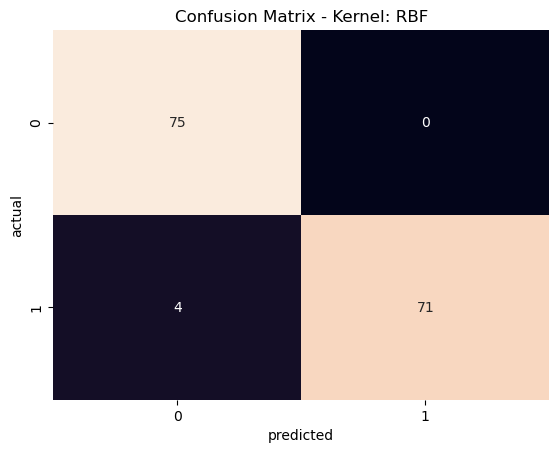

In [12]:
def report_metrics(model, X, y, kernel_name):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred)
    precision = precision_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    print(f"kernel {kernel_name}:")
    print("accuracy =", accuracy)
    print(" Recall =", recall)
    print("Precision =", precision)
    print("confusion matrix:")
    print(cm)
    sns.heatmap(cm, annot=True, cbar=False)
    plt.title(f"Confusion Matrix - Kernel: {kernel_name}")
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.show()

report_metrics(random_search_rbf.best_estimator_, X_test, y_test, "RBF")

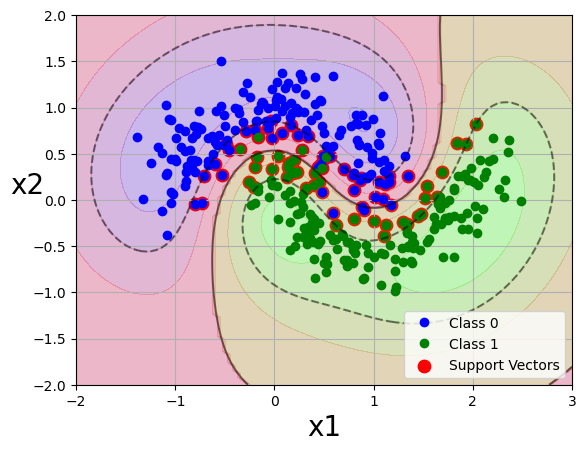

In [18]:
moons_plt(random_search_rbf.best_estimator_, X_train, y_train)
plt.show()

kernel Polynomial:
accuracy = 0.98
 Recall = 0.96
Precision = 1.0
confusion matrix:
[[75  0]
 [ 3 72]]


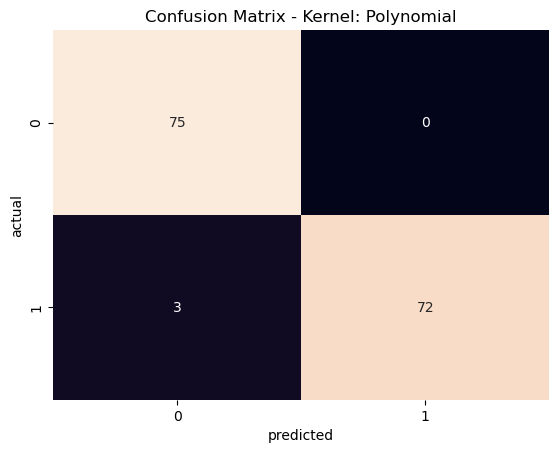

In [13]:
svm_poly = SVC(kernel='poly')
random_search_poly = RandomizedSearchCV(svm_poly, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
random_search_poly.fit(X_train, y_train)
report_metrics(random_search_poly.best_estimator_, X_test, y_test, "Polynomial")

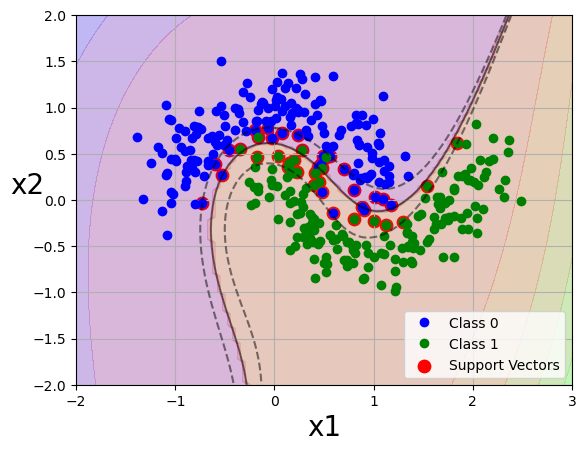

In [19]:
moons_plt(random_search_poly.best_estimator_, X_train, y_train)
plt.show()

kernel Linear:
accuracy = 0.8666666666666667
 Recall = 0.84
Precision = 0.8873239436619719
confusion matrix:
[[67  8]
 [12 63]]


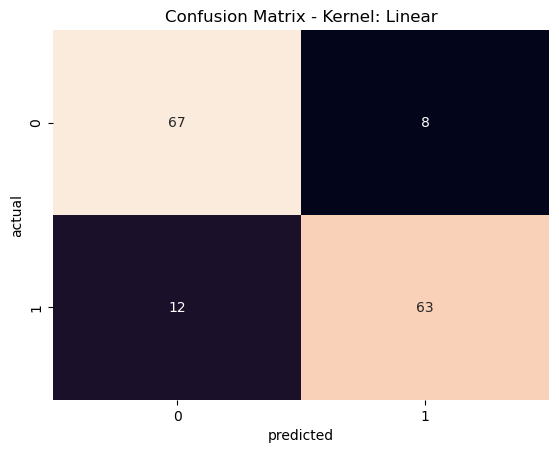

In [14]:
svm_linear = SVC(kernel='linear')
random_search_linear = RandomizedSearchCV(svm_linear, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
random_search_linear.fit(X_train, y_train)
report_metrics(random_search_linear.best_estimator_, X_test, y_test, "Linear")

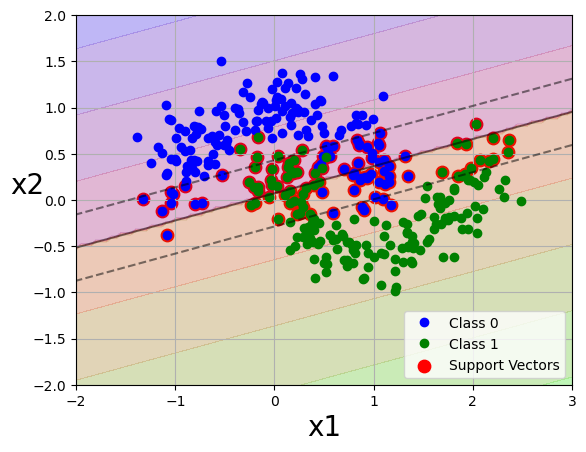

In [20]:
moons_plt(random_search_linear.best_estimator_, X_train, y_train)
plt.show()

kernel Sigmoid:
accuracy = 0.88
 Recall = 0.8666666666666667
Precision = 0.8904109589041096
confusion matrix:
[[67  8]
 [10 65]]


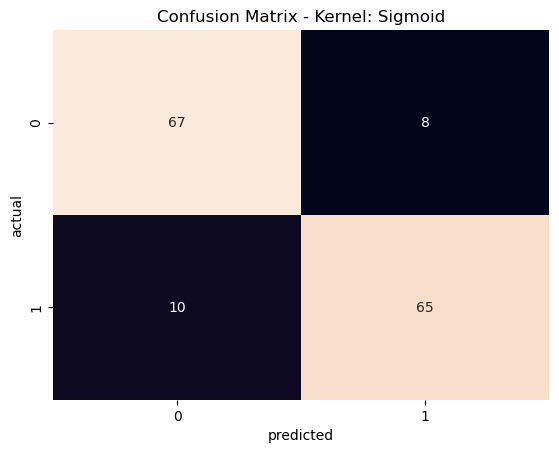

In [15]:
svm_sig = SVC(kernel='sigmoid')
random_search_sig = RandomizedSearchCV(svm_sig, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
random_search_sig.fit(X_train, y_train)
report_metrics(random_search_sig.best_estimator_, X_test, y_test, "Sigmoid")

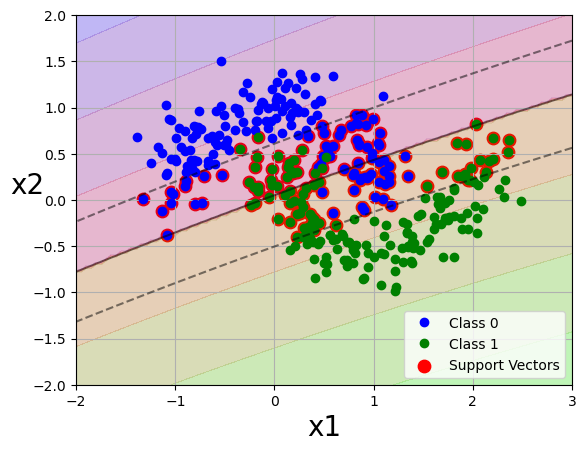

In [21]:
moons_plt(random_search_sig.best_estimator_, X_train, y_train)
plt.show()

In [ ]:
#### 2 #####

In [8]:
from sklearn.datasets import load_diabetes
diabetes_data=load_diabetes()
X,y=diabetes_data.data, diabetes_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("training num:", len(X_train))
print("test num:", len(X_test))

training num: 309
test num: 133


In [9]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid_rbf = {
    'C': [0.01,0.05,0.1,0.5,1,2,2.5],
    'epsilon': [0.1, 0.01, 0.001, 0.0001]}
svm_rbf = SVR(kernel='rbf')
grid_search_rbf = GridSearchCV(svm_rbf, param_grid=param_grid_rbf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rbf.fit(X_train, y_train)
best_params_rbf = grid_search_rbf.best_params_
print("best hyperparameters RBF:")
print(best_params_rbf)

best hyperparameters RBF:
{'C': 2.5, 'epsilon': 0.1}


In [10]:
param_grid_linear = {
    'C': [0.01,0.05,0.1,0.5,1,2,2.5]}
svm_linear = SVR(kernel='linear')
grid_search_linear = GridSearchCV(svm_linear, param_grid=param_grid_linear, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_linear.fit(X_train, y_train)
best_params_linear = grid_search_linear.best_params_
print("best huperparameters Linear:")
print(best_params_linear)

best huperparameters Linear:
{'C': 2.5}


In [33]:
param_grid_poly = {
    'C': [0.01,0.05,0.1,0.5,1,2,2.5],
    'epsilon': [0.1, 0.01, 0.001, 0.0001],
    'degree': [2, 3, 4, 5]}
svm_poly = SVR(kernel='poly')
grid_search_poly = GridSearchCV(svm_poly, param_grid=param_grid_poly, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_poly.fit(X_train, y_train)
best_params_poly = grid_search_poly.best_params_
print("best hyperparameters Polynomial:")
print(best_params_poly)

best hyperparameters Polynomial:
{'C': 2.5, 'degree': 3, 'epsilon': 0.1}


In [34]:
param_grid_sigmoid = {
    'C': [0.01,0.05,0.1,0.5,1,2,2.5],
                      'epsilon': [0.1, 0.01, 0.001, 0.0001],
                      'coef0': [0.1, 0.5, 1, 2]}
svm_sigmoid = SVR(kernel='sigmoid')
grid_search_sigmoid = GridSearchCV(svm_sigmoid, param_grid=param_grid_sigmoid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_sigmoid.fit(X_train, y_train)
best_params_sigmoid = grid_search_sigmoid.best_params_
print("best hyperparameters Sigmoid:")
print(best_params_sigmoid)

best hyperparameters Sigmoid:
{'C': 2.5, 'coef0': 0.1, 'epsilon': 0.0001}


In [36]:
results_df = pd.DataFrame(columns=['Kernel', 'Best C', 'Best Epsilon', 'Best Degree', 'Best Coef0', 'Best MSE'])
results_df = results_df.append({
    'Kernel': 'RBF',
    'Best C': best_params_rbf['C'],
    'Best Epsilon': best_params_rbf['epsilon'],
    'Best Degree': '-',
    'Best Coef0': '-',
    'Best MSE': -grid_search_rbf.best_score_}, ignore_index=True)
results_df = results_df.append({
    'Kernel': 'Linear',
    'Best C': best_params_linear['C'],
    'Best Epsilon': '-',
    'Best Degree': '-',
    'Best Coef0': '-',
    'Best MSE': -grid_search_linear.best_score_}, ignore_index=True)
results_df = results_df.append({
    'Kernel': 'Polynomial',
    'Best C': best_params_poly['C'],
    'Best Epsilon': best_params_poly['epsilon'],
    'Best Degree': best_params_poly['degree'],
    'Best Coef0': '-',
    'Best MSE': -grid_search_poly.best_score_}, ignore_index=True)
results_df = results_df.append({
    'Kernel': 'Sigmoid',
    'Best C': best_params_sigmoid['C'],
    'Best Epsilon': best_params_sigmoid['epsilon'],
    'Best Degree': '-',
    'Best Coef0': best_params_sigmoid['coef0'],
    'Best MSE': -grid_search_sigmoid.best_score_}, ignore_index=True)
print(results_df)

C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_8176\91672137.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


       Kernel  Best C Best Epsilon Best Degree Best Coef0     Best MSE
0         RBF     2.5          0.1           -          -  4794.579744
1      Linear     2.5            -           -          -  6083.670364
2  Polynomial     2.5          0.1           3          -  4533.889958
3     Sigmoid     2.5       0.0001           -        0.1  3554.919320


C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_8176\91672137.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_8176\91672137.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_8176\91672137.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
y_pred = linear_regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy= 1-mae
r_squared = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r_squared}')
print(f'accuracy: {accuracy}')

Mean Squared Error (MSE): 2821.750981001311
R-squared: 0.4772897164322617
accuracy: -40.919378456792735


In [41]:
results_df = pd.DataFrame(columns=['Kernel', 'Best C', 'Best Epsilon', 'Best Degree', 'Best Coef0', 'Best MSE', 'best RMSE'])
results_df = results_df.append({
    'Kernel': 'RBF',
    'Best C': best_params_rbf['C'],
    'Best Epsilon': best_params_rbf['epsilon'],
    'Best Degree': '-',
    'Best Coef0': '-',
    'Best MSE': -grid_search_rbf.best_score_,
    'best RMSE': np.sqrt(-grid_search_rbf.best_score_)}, ignore_index=True)
results_df = results_df.append({
    'Kernel': 'Linear',
    'Best C': best_params_linear['C'],
    'Best Epsilon': '-',
    'Best Degree': '-',
    'Best Coef0': '-',
    'Best MSE': -grid_search_linear.best_score_,
    'best RMSE': np.sqrt(-grid_search_linear.best_score_)},
    ignore_index=True)
results_df = results_df.append({
    'Kernel': 'Polynomial',
    'Best C': best_params_poly['C'],
    'Best Epsilon': best_params_poly['epsilon'],
    'Best Degree': best_params_poly['degree'],
    'Best Coef0': '-',
    'Best MSE': -grid_search_poly.best_score_,
    'best RMSE': np.sqrt(-grid_search_poly.best_score_)},
    ignore_index=True)
results_df = results_df.append({
    'Kernel': 'Sigmoid',
    'Best C': best_params_sigmoid['C'],
    'Best Epsilon': best_params_sigmoid['epsilon'],
    'Best Degree': '-',
    'Best Coef0': best_params_sigmoid['coef0'],
    'Best MSE': -grid_search_sigmoid.best_score_,
    'best RMSE': np.sqrt(-grid_search_sigmoid.best_score_)},
    ignore_index=True)
results_df = results_df.append({
    'Kernel': 'Linear regression',
    'Best C': '-',
    'Best Epsilon': '-',
    'Best Degree': '-',
    'Best Coef0': '-',
    'Best MSE': mse,
    'best RMSE': np.sqrt(mse)},
    ignore_index=True)
print(results_df)

              Kernel Best C Best Epsilon Best Degree Best Coef0     Best MSE  \
0                RBF    2.5          0.1           -          -  4794.579744   
1             Linear    2.5            -           -          -  6083.670364   
2         Polynomial    2.5          0.1           3          -  4533.889958   
3            Sigmoid    2.5       0.0001           -        0.1  3554.919320   
4  Linear regression      -            -           -          -  2821.750981   

   best RMSE  
0  69.242904  
1  77.997887  
2  67.334166  
3  59.623144  
4  53.120156  


C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_8176\2978509128.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_8176\2978509128.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_8176\2978509128.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_8176\2978509128.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = resul